# Estudio de diferentes modelos de LDA

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar dependencias.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 

In [3]:
!pip3 install roc_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Cargar el nuevo dataset.
Datos = pd.read_excel('/content/drive/MyDrive/AB Proyecto/MI_cleandata_new.xlsx', sheet_name='Hoja1', index_col=0)
Datos.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1648
Columns: 116 entries, AGE to zab_leg_06
dtypes: float64(5), int64(111)
memory usage: 1.5 MB


En la exploración inicial se ha determinado que las variables que presentan una relación con la variable ZSN són: AGE, ZSN_A, OTEK_LANC, endocr_01, zab_leg_01, ALT_BLOOD Y ROE.

A continuación, se procede a crear modelos basados en el classificador SVM, con las siguientes combinaciones de variables seleccionadas. 

Combinación 1:
AGE, ALT_BLOOD

Combinación 2:
AGE, ALT_BLOOD, ZSN_A, ROE

Combinación 3:
AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD

Combinación 4:
AGE, ZSN_A, OTEK_LANC, endocr_01, zab_leg_01

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Crear numpy arrays con las diferentes variables escogidas como "features".
AGE = Datos['AGE'][:, np.newaxis]
OTEK_LANC	 = Datos['OTEK_LANC'][:, np.newaxis]
SEX = Datos['SEX'][:, np.newaxis]
ZSN_A = Datos['ZSN_A'][:, np.newaxis]
ALT_BLOOD = Datos['ALT_BLOOD'][:, np.newaxis]
ROE = Datos['ROE'][:, np.newaxis]
endocr_01 = Datos['endocr_01'][:, np.newaxis]
zab_leg_01 = Datos['zab_leg_01'][:, np.newaxis]

# Imprimir forma de los arrays para verificar que se han creado correctamente.
print(AGE.shape)
print(OTEK_LANC.shape)
print(SEX.shape)
print(ZSN_A.shape)
print(ALT_BLOOD.shape)
print(endocr_01.shape)
print(ROE.shape)
print(zab_leg_01.shape)

(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)
(1649, 1)


In [6]:
# Crear numpy arrays con los "labels" de variable a predecir.
ZSN = Datos['ZSN']

# Imprimir forma del array para verificar que se ha creado correctamente.
print(ZSN.shape)

(1649,)


A continuación, se crearan 6 arrays de features, creados a partir de las 6 combinaciones posibles a generar a partir de la unión de las 3 variables.

In [7]:
from numpy.core.multiarray import concatenate

# Crear los 4 arrays de features a partir de las combinaciones de las 7 variables:

# Combinación 1:
X_1 = np.concatenate((AGE, ALT_BLOOD), axis=1)

# Combinación 2:
X_2 = np.concatenate((AGE, ALT_BLOOD, ZSN_A, ROE), axis=1)

# Combinación 3:
X_3 = np.concatenate((AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD), axis=1)

# Combinación 4:
X_4 = np.concatenate((AGE, ZSN_A, OTEK_LANC, endocr_01, zab_leg_01), axis=1)

# Imprimir forma de los arrays para verificar que se han creado correctamente.
print(X_1.shape)
print(X_2.shape)
print(X_3.shape)
print(X_4.shape)

(1649, 2)
(1649, 4)
(1649, 5)
(1649, 5)


In [8]:
# Definir el array de labels de la variable a predecir.
y = ZSN

A continuación, se procede a crear un modelo para cada una de las 6 combinaciones. Los pasos a seguir són:

1.- Dividir los datos.

2.- Escalamiento de datos.

3.- Entrenamiento del modelo.

4.- Análisis de los resultados obtenidos: Classification report, matrix de confusión y curva ROC.

5.- Validación cruzada con K-fold.


## Modelo 1: Combinación 1

### Dividir los datos

In [9]:
from sklearn.model_selection import train_test_split

X = X_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Entrenamiento del modelo

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creación del modelo LDA.
model_LDA = LinearDiscriminantAnalysis(solver='svd')

# Entrenamiento.
model_LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
print("classes: {} \nintercept: {} \ncoefficientes: {}"
      .format(model_LDA.classes_,model_LDA.intercept_, model_LDA.coef_))

classes: [0 1] 
intercept: [-3.4847844] 
coefficientes: [[0.03307346 0.43005866]]


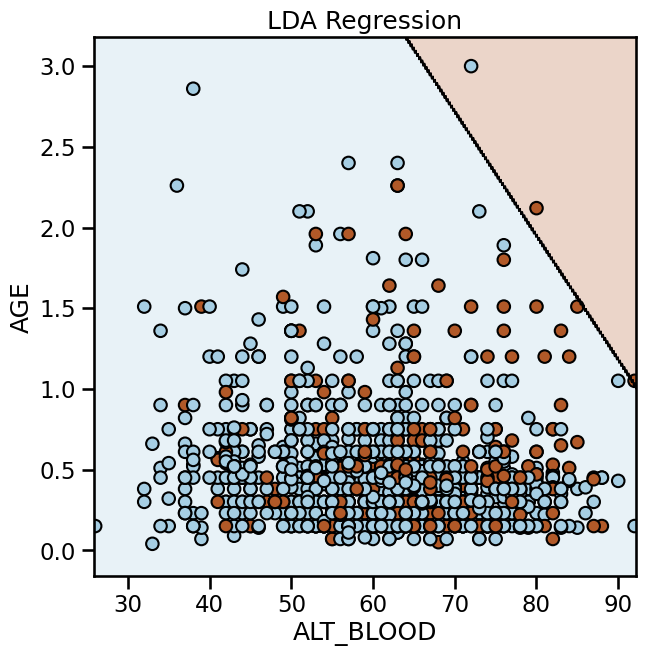

In [13]:
def plot_decision_boundary(clf, X, Y, cmap='Paired'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', label=Y);
  
sns.set_context("talk")
plot_decision_boundary(model_LDA ,X_train,y_train)
plt.title("LDA Regression");
plt.xlabel("ALT_BLOOD")
plt.ylabel("AGE")
plt.show()

### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [14]:
from sklearn.metrics import accuracy_score 

# Accuracy y error de entrenamiento.
y_train_pred = model_LDA.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7672479150871873 
Trainig error: 0.23275208491281274


In [15]:
# Función para visualizar la matrix de confusión
def plot_cm(Y, y_pred,clf):
    cm = confusion_matrix(Y, y_pred)
    cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
    cm_df.index.name = 'True'
    cm_df.columns.name = 'Predicted'
    ax=sns.heatmap(cm_df, # Visualizando la matriz de confusion
             annot=True, fmt='2d', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':20})

Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1012
           1       0.00      0.00      0.00       307

    accuracy                           0.77      1319
   macro avg       0.38      0.50      0.43      1319
weighted avg       0.59      0.77      0.67      1319

 
Matriz de confusión


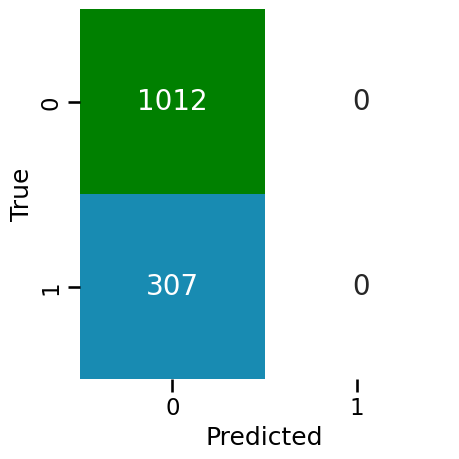

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model_LDA)

In [17]:
# Funcion para calcular y visualizar la curva ROC.
def curveROC(X,y,model1_LDA):
    
    from sklearn.metrics import roc_curve, auc 
    
    y_prob = model_LDA.predict_proba(X)
    # calcula fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y, y_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Calcula el mejor threshold
    optimal_idx = np.argmax(tpr * (1-fpr))
    optimal_threshold = thresholds[optimal_idx]

    # Grafica ROC curve
    sns.set(font_scale=1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr[optimal_idx],tpr[optimal_idx],'o',label='Optimal threshold = %0.2f' % optimal_threshold)
    plt.plot([0, 1], [0, 1], 'k--')# curva de predicciones aleatorias  
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

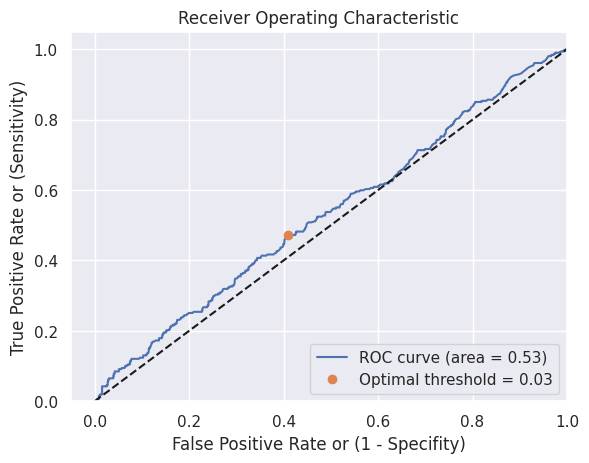

In [18]:
# Curva ROC.
curveROC(X_train_scal, y_train, model_LDA)

####Evaluación de los resultados del test

In [19]:
# Accuracy y error de test.
y_test_pred = model_LDA.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7666666666666667 
Test error: 0.23333333333333328


Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       253
           1       0.00      0.00      0.00        77

    accuracy                           0.77       330
   macro avg       0.38      0.50      0.43       330
weighted avg       0.59      0.77      0.67       330

 
Matriz de confusión


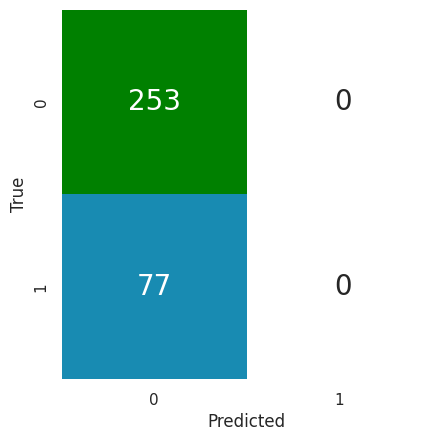

In [20]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model_LDA)

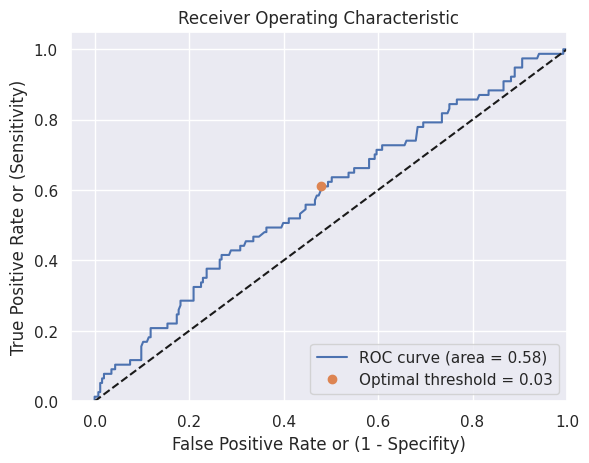

In [21]:
# Curva ROC.
curveROC(X_test_scal, y_test, model_LDA)

### Validación cruzada

In [22]:
# Funcion para calcular y visualizar la matriz de confusion 
def plotCM(ytrue, ypred, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    from sklearn.metrics import confusion_matrix
    CM = confusion_matrix(ytrue,ypred)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
    if clases == None:
        clases = list(set(ytrue))    # corregido el bug, las clases deben ser con la verdad!
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    
#     plt.show()

Iteración 1
Precision promedio =  1.0
Accuracy promedio =  0.7696969696969697
Sensibility promedio =  0.012987012987012988
Specificity promedio =  1.0
Iteración 2
Precision promedio =  0.75
Accuracy promedio =  0.7681818181818182
Sensibility promedio =  0.012987012987012988
Specificity promedio =  0.9980237154150198
Iteración 3
Precision promedio =  0.5
Accuracy promedio =  0.7676767676767677
Sensibility promedio =  0.008658008658008658
Specificity promedio =  0.9986824769433466
Iteración 4
Precision promedio =  0.625
Accuracy promedio =  0.7681818181818182
Sensibility promedio =  0.00974025974025974
Specificity promedio =  0.9990118577075099
Iteración 5
Precision promedio =  0.54
Accuracy promedio =  0.7665211384360321
Sensibility promedio =  0.010423786739576214
Specificity promedio =  0.9960474308300394


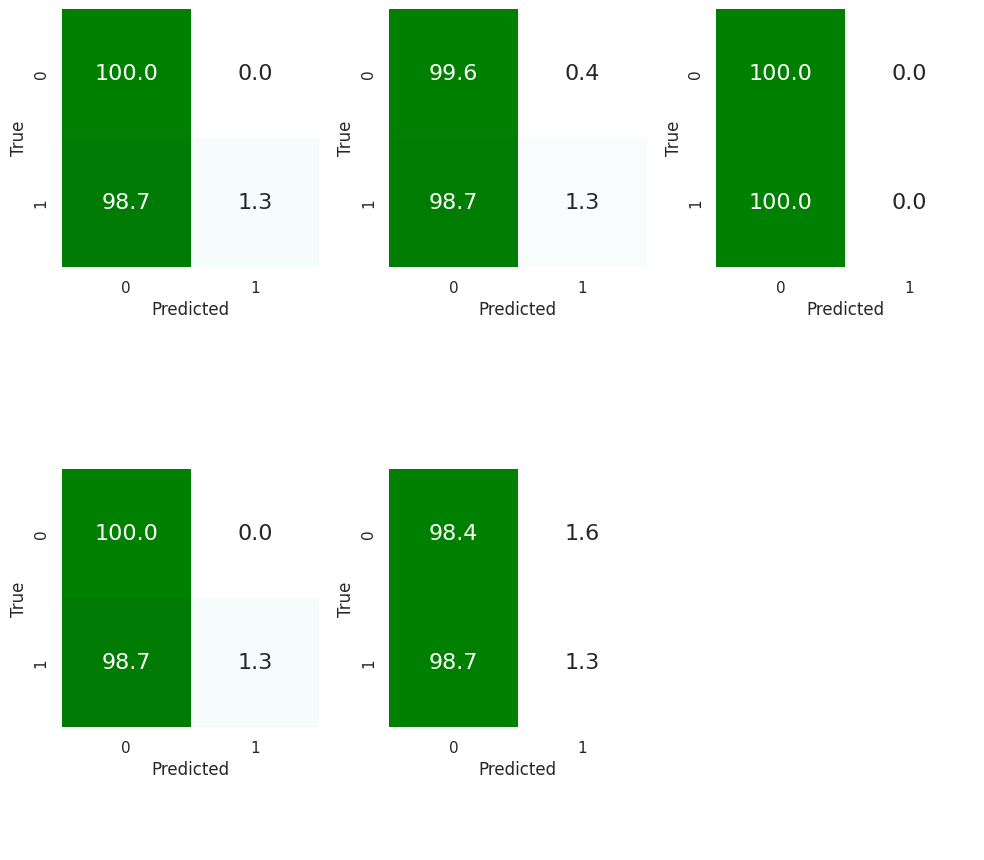

In [23]:
from sklearn.model_selection import StratifiedKFold
import roc_utils as ru
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score, accuracy_score, recall_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []

iter = 0
rocs = []

fig, ax = plt.subplots(2,3,figsize = (10,10))
k = 0
    
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearDiscriminantAnalysis(solver='svd')
    model.fit(X_train_scaled, y_train) 
    y_pred_test = model.predict(X_test_scaled)
    
    pre.append(precision_score(y_test,y_pred_test)) 
    acc.append(accuracy_score(y_test,y_pred_test))
    sen.append(recall_score(y_test,y_pred_test))
    spe.append(recall_score(y_test,y_pred_test, pos_label=0))
    
    iter = iter + 1
    print('Iteración', iter)
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    
    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred_test,normalize=True, ax = ax.flatten()[k])
    k += 1
    
    ax[1,2].axis('off')
    plt.show
    
    # set the spacing between subplots
    fig.tight_layout()

    #Las curvas ROC de cada iteración    
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)
  

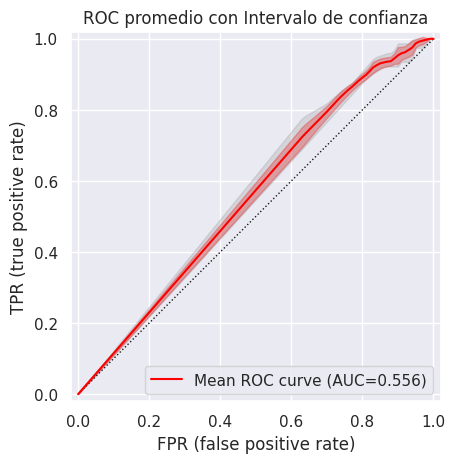

In [24]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

El modelo tiene una accuracy superior al 76% tanto en el entrenamiento y el test, como en la validación cruzada. Sin embargo, el classification report y la matriz de confusión sugieren que el modelo siempre clasifica a las muestras como "0". En el classification report, el f1 de la classe 0 es considerablemente grande (y cercana a 1), mientras que el f1 de la classe 1 es 0. En la matriz de confusión se observa que el modelo ha predecido correctamente pocas muestras que eran verdaderos positivos. En la curva ROC podemos ver que la gran mayoría de curva se encuentra por encima del eje, aunque no muy por encima.

Esto puede ser debido a que se han usado muy pocas variables o variables que no presentan una relación suficientemente grande con ZSN. Adicionalmente, el modelo ha sido entrenado con un número de muestras de la classe 0 mucho mayor que el de la classe 1, lo cual puede ser la razón por la cuál el modelo está "memorizando" que en la mayoría de casos el resultado es "0". Esto resulta en una baja capabilidad para generalizar.

En definitiva, el modelo 1, dónde se predice la variable ZSN a partir de las variables AGE y ALT_BLOOD, no es un buen clasificador de ZSN.

## Modelo 2: Combinación 2

### Dividir los datos

In [25]:
X = X_2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [26]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Entrenamiento del modelo

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creación del modelo LDA.
model_LDA = LinearDiscriminantAnalysis(solver='svd')

# Entrenamiento.
model_LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [28]:
print("classes: {} \nintercept: {} \ncoefficientes: {}"
      .format(model_LDA.classes_,model_LDA.intercept_, model_LDA.coef_))

classes: [0 1] 
intercept: [-3.3955908] 
coefficientes: [[ 2.91359961e-02  4.29859495e-01  6.19835313e-01 -4.72305971e-04]]


### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [29]:
from sklearn.metrics import accuracy_score 

# Accuracy y error de entrenamiento.
y_train_pred = model_LDA.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7664897649734648 
Trainig error: 0.23351023502653523


Classification report
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1012
           1       0.47      0.02      0.04       307

    accuracy                           0.77      1319
   macro avg       0.62      0.51      0.46      1319
weighted avg       0.70      0.77      0.68      1319

 
Matriz de confusión


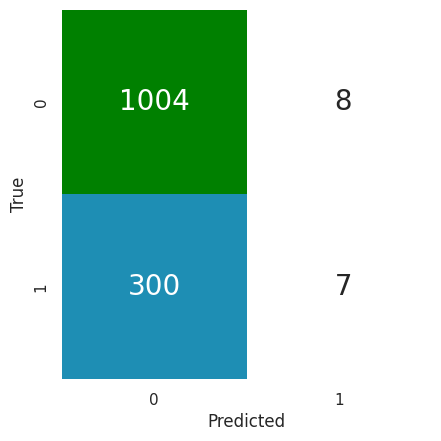

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model_LDA)

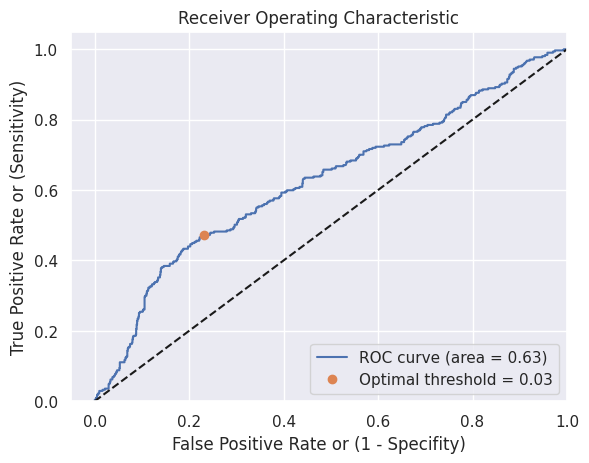

In [31]:
# Curva ROC.
curveROC(X_train_scal, y_train, model_LDA)

####Evaluación de los resultados del test

In [32]:
# Accuracy y error de test.
y_test_pred = model_LDA.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7666666666666667 
Test error: 0.23333333333333328


Classification report
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       253
           1       0.50      0.03      0.05        77

    accuracy                           0.77       330
   macro avg       0.63      0.51      0.46       330
weighted avg       0.71      0.77      0.68       330

 
Matriz de confusión


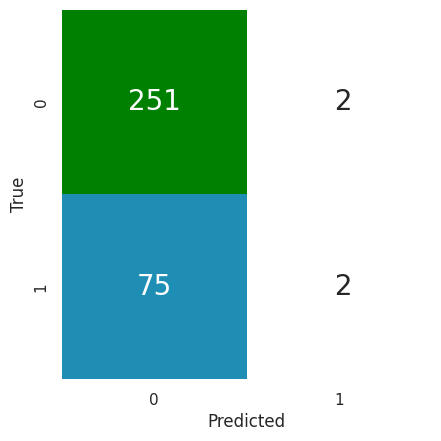

In [33]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model_LDA)

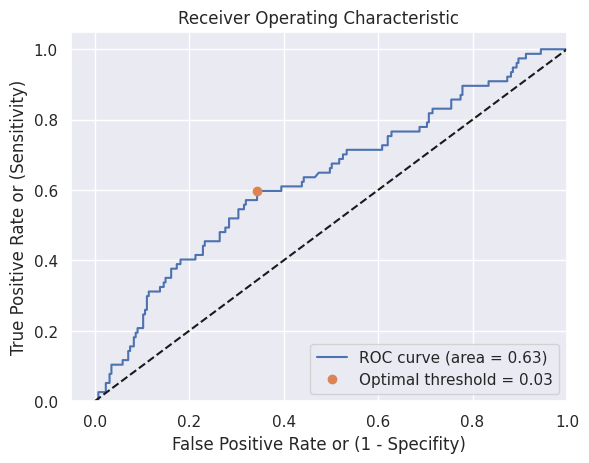

In [34]:
# Curva ROC.
curveROC(X_test_scal, y_test, model)

### Validación cruzada

Iteración 1
Precision promedio =  0.6
Accuracy promedio =  0.7727272727272727
Sensibility promedio =  0.07792207792207792
Specificity promedio =  0.9841897233201581
Iteración 2
Precision promedio =  0.5272727272727272
Accuracy promedio =  0.7681818181818182
Sensibility promedio =  0.07142857142857142
Specificity promedio =  0.9802371541501976
Iteración 3
Precision promedio =  0.4515151515151515
Accuracy promedio =  0.7636363636363637
Sensibility promedio =  0.06060606060606061
Specificity promedio =  0.9776021080368906
Iteración 4
Precision promedio =  0.3386363636363636
Accuracy promedio =  0.7575757575757576
Sensibility promedio =  0.045454545454545456
Specificity promedio =  0.9743083003952568
Iteración 5
Precision promedio =  0.3153535353535354
Accuracy promedio =  0.7537809708022474
Sensibility promedio =  0.04688995215311005
Specificity promedio =  0.9683794466403162


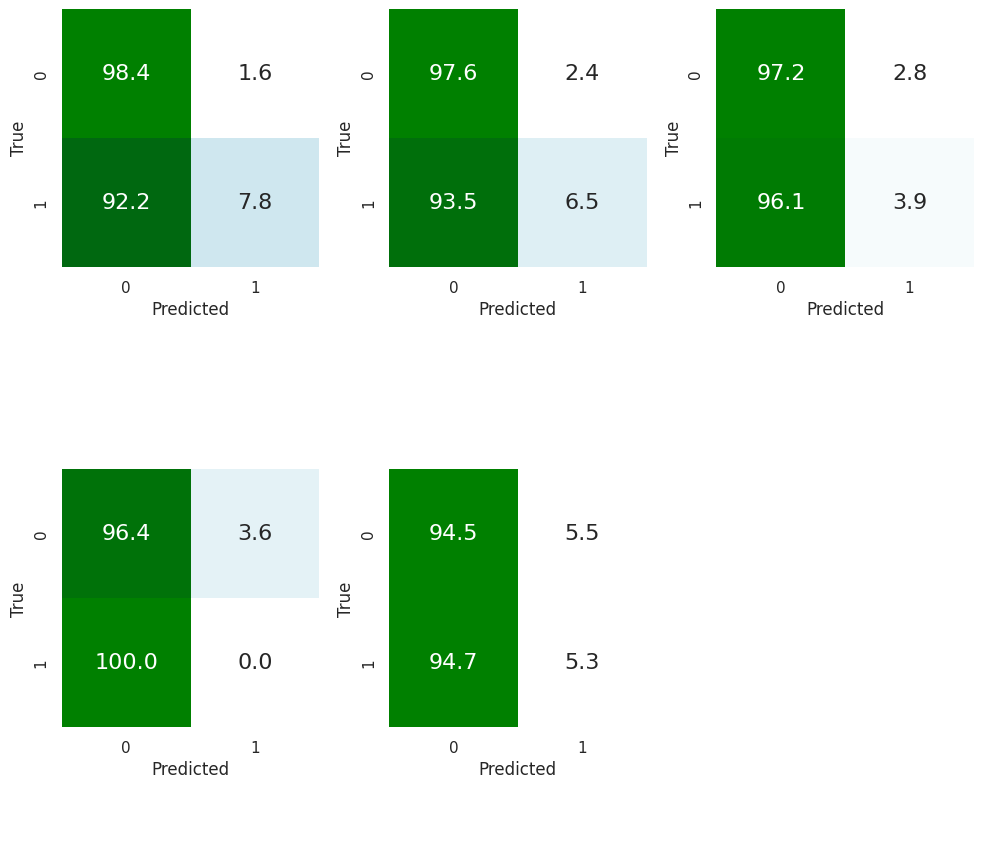

In [35]:
from sklearn.model_selection import StratifiedKFold
import roc_utils as ru
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score, accuracy_score, recall_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []

iter = 0
rocs = []

fig, ax = plt.subplots(2,3,figsize = (10,10))
k = 0
    
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearDiscriminantAnalysis(solver='svd')
    model.fit(X_train_scaled, y_train) 
    y_pred_test = model.predict(X_test_scaled)
    
    pre.append(precision_score(y_test,y_pred_test)) 
    acc.append(accuracy_score(y_test,y_pred_test))
    sen.append(recall_score(y_test,y_pred_test))
    spe.append(recall_score(y_test,y_pred_test, pos_label=0))
    
    iter = iter + 1
    print('Iteración', iter)
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    
    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred_test,normalize=True, ax = ax.flatten()[k])
    k += 1
    
    ax[1,2].axis('off')
    plt.show
  
    # set the spacing between subplots
    fig.tight_layout()

    #Las curvas ROC de cada iteración    
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)

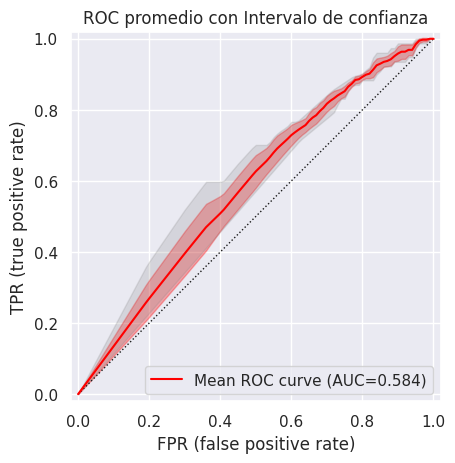

In [36]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

Nuevamente, el modelo tiene una accuracy superior al 76% tanto en el entrenamiento y el test, como en la validación cruzada. Sin embargo, como se ha visto antes, el classification report y la matriz de confusión sugieren que el modelo siempre clasifica a las muestras como "0". El f1 de la classe 0 es considerablemente grande, mientras que el f1 de la classe 1 es 0. En la matriz de confusión, se observa que casi la totalidad de muestras han sido clasificadas como clase 0. En la curva ROC podemos ver que la gran mayoría de curva se encuentra por encima del eje, aunque no muy por encima.

Aunque es cierto que tanto la curva ROC (AUC tiene un número mayor) y la matriz de confusión son mejores que el anterior modelo, no es suficiente para decir que es un buen modelo.
Esto puede ser debido a que se han usado variables que no presentan una relación suficientemente grande con ZSN, además del hecho que el modelo no es capaz de generalizar.

En definitiva, el modelo 2, dónde se predice la variable ZSN a partir de las variables AGE, ALT_BLOOD, ZSN_A, ROE, no es un buen clasificador de ZSN.

## Modelo 3: Combinación 3

### Dividir los datos

In [37]:
X = X_3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [38]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Entrenamiento del modelo

In [39]:
# Creación del modelo LDA.
model_LDA = LinearDiscriminantAnalysis(solver='svd')

# Entrenamiento.
model_LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [40]:
print("classes: {} \nintercept: {} \ncoefficientes: {}"
      .format(model_LDA.classes_,model_LDA.intercept_, model_LDA.coef_))

classes: [0 1] 
intercept: [-3.04453935] 
coefficientes: [[ 0.02387253  0.59932879  0.80993021 -0.2090699   0.44911354]]


### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [41]:
# Accuracy y error de entrenamiento.
y_train_pred = model_LDA.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7710386656557998 
Trainig error: 0.22896133434420018


Classification report
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1012
           1       0.57      0.07      0.12       307

    accuracy                           0.77      1319
   macro avg       0.67      0.53      0.50      1319
weighted avg       0.73      0.77      0.69      1319

 
Matriz de confusión


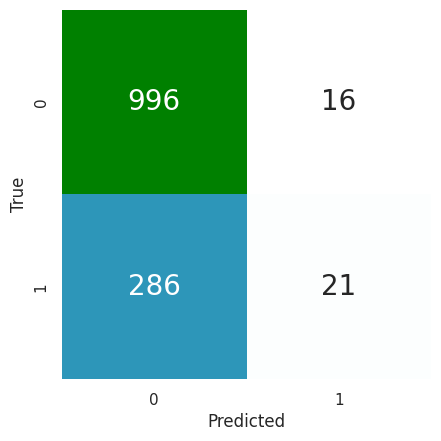

In [42]:
# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model_LDA)

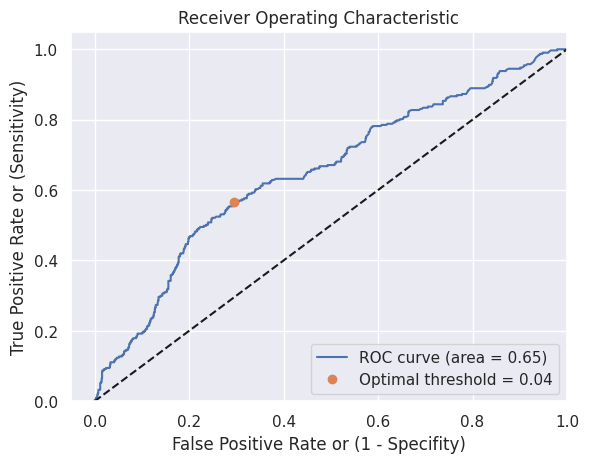

In [43]:
# Curva ROC.
curveROC(X_train_scal, y_train, model_LDA)

####Evaluación de los resultados del test

In [44]:
# Accuracy y error de test.
y_test_pred = model_LDA.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7575757575757576 
Test error: 0.24242424242424243


Classification report
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       253
           1       0.33      0.04      0.07        77

    accuracy                           0.76       330
   macro avg       0.55      0.51      0.47       330
weighted avg       0.67      0.76      0.68       330

 
Matriz de confusión


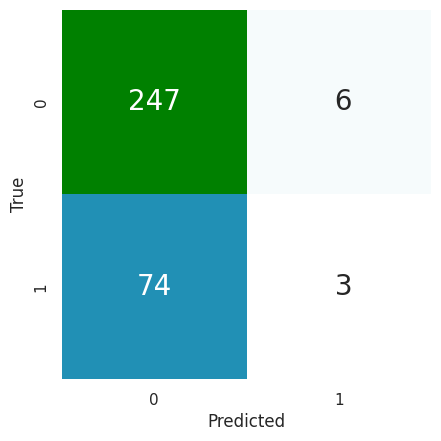

In [45]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model_LDA)

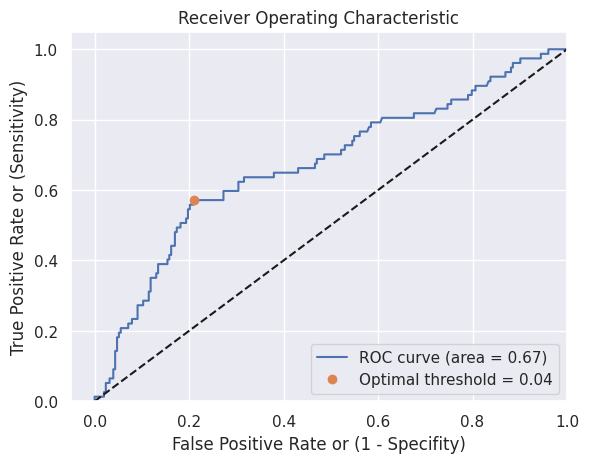

In [46]:
# Curva ROC.
curveROC(X_test_scal, y_test, model)

### Validación cruzada

Iteración 1
Precision promedio =  0.8
Accuracy promedio =  0.7848484848484848
Sensibility promedio =  0.1038961038961039
Specificity promedio =  0.9920948616600791
Iteración 2
Precision promedio =  0.65
Accuracy promedio =  0.7757575757575758
Sensibility promedio =  0.09090909090909091
Specificity promedio =  0.9841897233201582
Iteración 3
Precision promedio =  0.5444444444444444
Accuracy promedio =  0.7676767676767676
Sensibility promedio =  0.08225108225108226
Specificity promedio =  0.9762845849802373
Iteración 4
Precision promedio =  0.44679487179487176
Accuracy promedio =  0.7606060606060605
Sensibility promedio =  0.06818181818181818
Specificity promedio =  0.9713438735177866
Iteración 5
Precision promedio =  0.42743589743589744
Accuracy promedio =  0.758636824168739
Sensibility promedio =  0.07296650717703348
Specificity promedio =  0.966798418972332


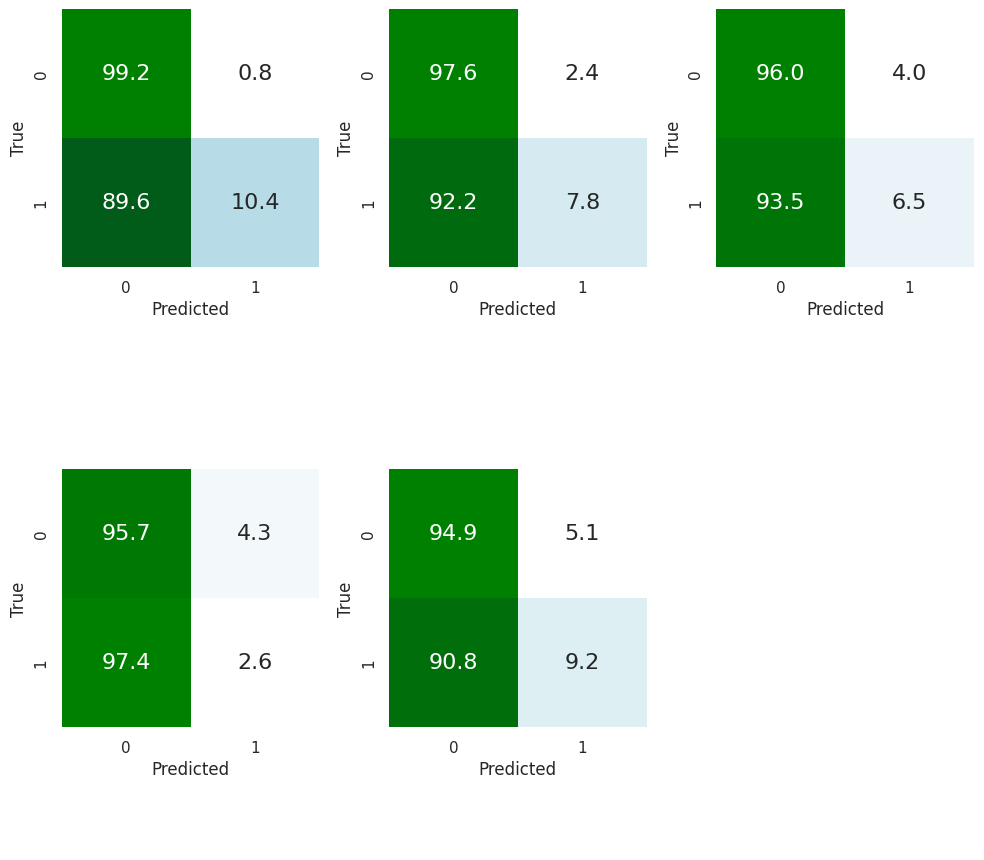

In [47]:
from sklearn.model_selection import StratifiedKFold
import roc_utils as ru
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score, accuracy_score, recall_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []

iter = 0
rocs = []

fig, ax = plt.subplots(2,3,figsize = (10,10))
k = 0
    
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearDiscriminantAnalysis(solver='svd')
    model.fit(X_train_scaled, y_train) 
    y_pred_test = model.predict(X_test_scaled)
    
    pre.append(precision_score(y_test,y_pred_test)) 
    acc.append(accuracy_score(y_test,y_pred_test))
    sen.append(recall_score(y_test,y_pred_test))
    spe.append(recall_score(y_test,y_pred_test, pos_label=0))
    
    iter = iter + 1
    print('Iteración', iter)
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    
    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred_test,normalize=True, ax = ax.flatten()[k])
    k += 1
    
    ax[1,2].axis('off')
    plt.show
  
    # set the spacing between subplots
    fig.tight_layout()
  
    #Las curvas ROC de cada iteración    
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)

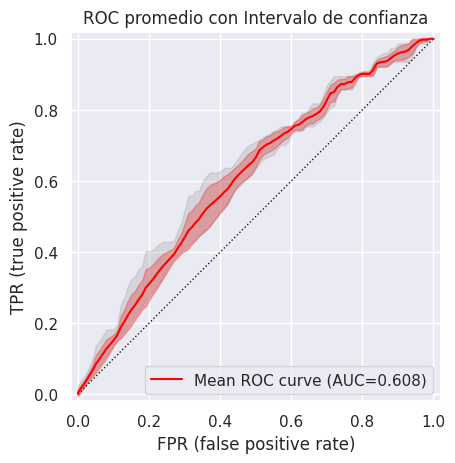

In [48]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

Como podemos ver, aunque no perfecto, el nuevo modelo es mejor que los dos anteriores. Observando la validación cruzada, junto con los resultados del entrenamiento y el test, la exactitud alcanzada es de aproximadamente 78% en todos los casos. 

En el clasificaction report se observa que la precision y el recall de la classe 1 ha mejorado, lo que significa que el modelo 3 es capaz de generalizar mejor que el primero. Esto se corresponde con los resultados de las matrices de confusión, ya que en todas se puede observar que algunas muestras de la clase 1 del test (y el entrenamiento) han sido predecidas correctamente como verdaderas y, por lo tanto, el modelo ya no ha "aprendido" a predecir todas las muestras como pertenecientes a la classe 0. El valor de AUC que se observa en la curva ROC también ha incrementado, lo cuál confirma que este tercer modelo es mejor que el anterior.

Aún así los valores de sensiblidad siguen siendo muy bajos, y en sí el modelo no consigue ser tan bueno debido a las variables a utilizar o por culpa en sí del própio clasificador que no es muy bueno en estos casos.

En definitiva, el modelo 3, dónde se predice la variable ZSN a partir de las variables AGE, ZSN_A, OTEK_LANC, SEX, ALT_BLOOD, no es un buen clasificador de ZSN pero si mejor a los anteriores.

## Modelo 3: Combinación 4

### Dividir los datos

In [49]:
X = X_4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Escalamiento de datos

In [50]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.fit_transform(X_test)

### Entrenamiento del modelo

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Creación del modelo LDA.
model_LDA = LinearDiscriminantAnalysis(solver='svd')

# Entrenamiento.
model_LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [52]:
print("classes: {} \nintercept: {} \ncoefficientes: {}"
      .format(model_LDA.classes_,model_LDA.intercept_, model_LDA.coef_))

classes: [0 1] 
intercept: [-3.05227142] 
coefficientes: [[0.0217461  0.60840504 0.78226645 0.76023996 1.1223585 ]]


### Evaluación del modelo

####Evaluación de los resultados del entrenamiento

In [53]:
# Accuracy y error de entrenamiento.
y_train_pred = model_LDA.predict(X_train_scal)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_err = 1-train_accuracy

print("Accuracy: {} \nTrainig error: {}".format(train_accuracy, train_err))

Accuracy: 0.7619408642911296 
Trainig error: 0.23805913570887038


Classification report
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1012
           1       0.46      0.15      0.23       307

    accuracy                           0.76      1319
   macro avg       0.63      0.55      0.54      1319
weighted avg       0.71      0.76      0.71      1319

 
Matriz de confusión


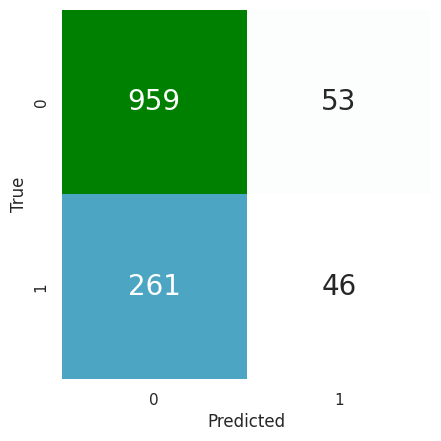

In [54]:
# Classification report.
print('Classification report')
print(classification_report(y_train, y_train_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_train, y_train_pred, clf=model_LDA)

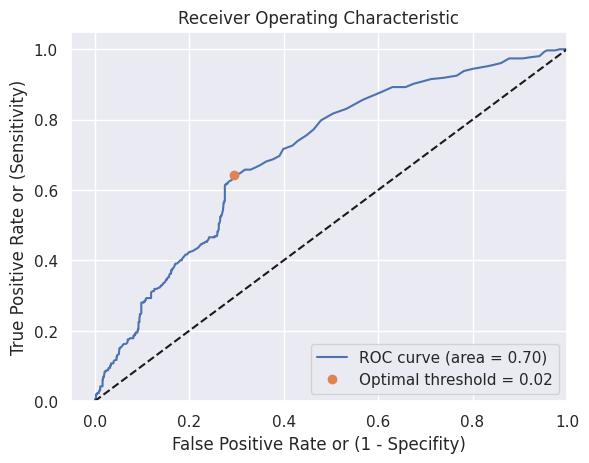

In [55]:
# Curva ROC.
curveROC(X_train_scal, y_train, model)

####Evaluación de los resultados del test

In [56]:
# Accuracy y error de test.
y_test_pred = model_LDA.predict(X_test_scal)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_err = 1-test_accuracy

print("Accuracy: {} \nTest error: {}".format(test_accuracy, test_err))

Accuracy: 0.7454545454545455 
Test error: 0.2545454545454545


Classification report
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       253
           1       0.41      0.19      0.26        77

    accuracy                           0.75       330
   macro avg       0.60      0.55      0.55       330
weighted avg       0.70      0.75      0.71       330

 
Matriz de confusión


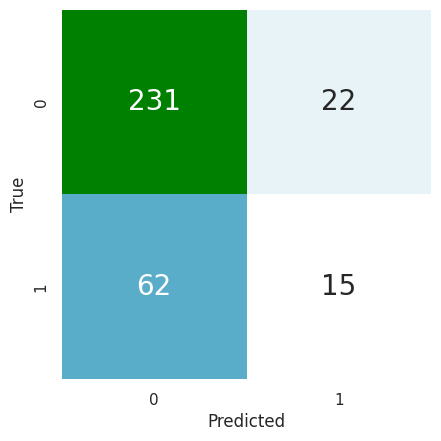

In [57]:
# Classification report.
print('Classification report')
print(classification_report(y_test, y_test_pred))
print(' ')

# Matriz de confusión.
print('Matriz de confusión')
plot_cm(y_test, y_test_pred, clf=model_LDA)

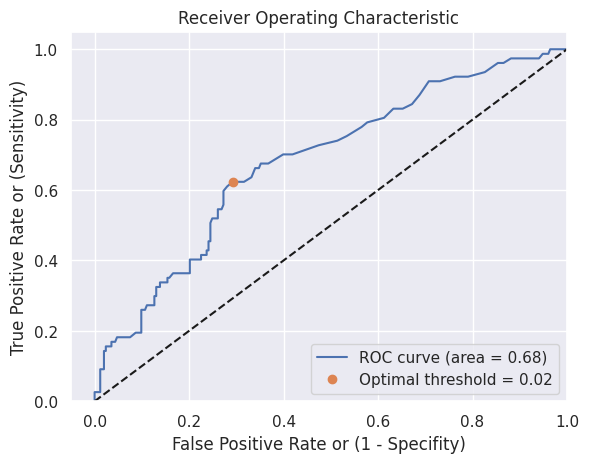

In [58]:
# Curva ROC.
curveROC(X_test_scal, y_test, model_LDA)

### Validación cruzada

Iteración 1
Precision promedio =  0.5294117647058824
Accuracy promedio =  0.7696969696969697
Sensibility promedio =  0.11688311688311688
Specificity promedio =  0.9683794466403162
Iteración 2
Precision promedio =  0.5459558823529411
Accuracy promedio =  0.7712121212121212
Sensibility promedio =  0.11688311688311688
Specificity promedio =  0.9703557312252964
Iteración 3
Precision promedio =  0.5195261437908497
Accuracy promedio =  0.7686868686868688
Sensibility promedio =  0.10822510822510822
Specificity promedio =  0.9696969696969697
Iteración 4
Precision promedio =  0.48339460784313726
Accuracy promedio =  0.7651515151515151
Sensibility promedio =  0.10064935064935066
Specificity promedio =  0.9673913043478262
Iteración 5
Precision promedio =  0.4724299719887955
Accuracy promedio =  0.7634889932762273
Sensibility promedio =  0.11209842788790159
Specificity promedio =  0.9612648221343875


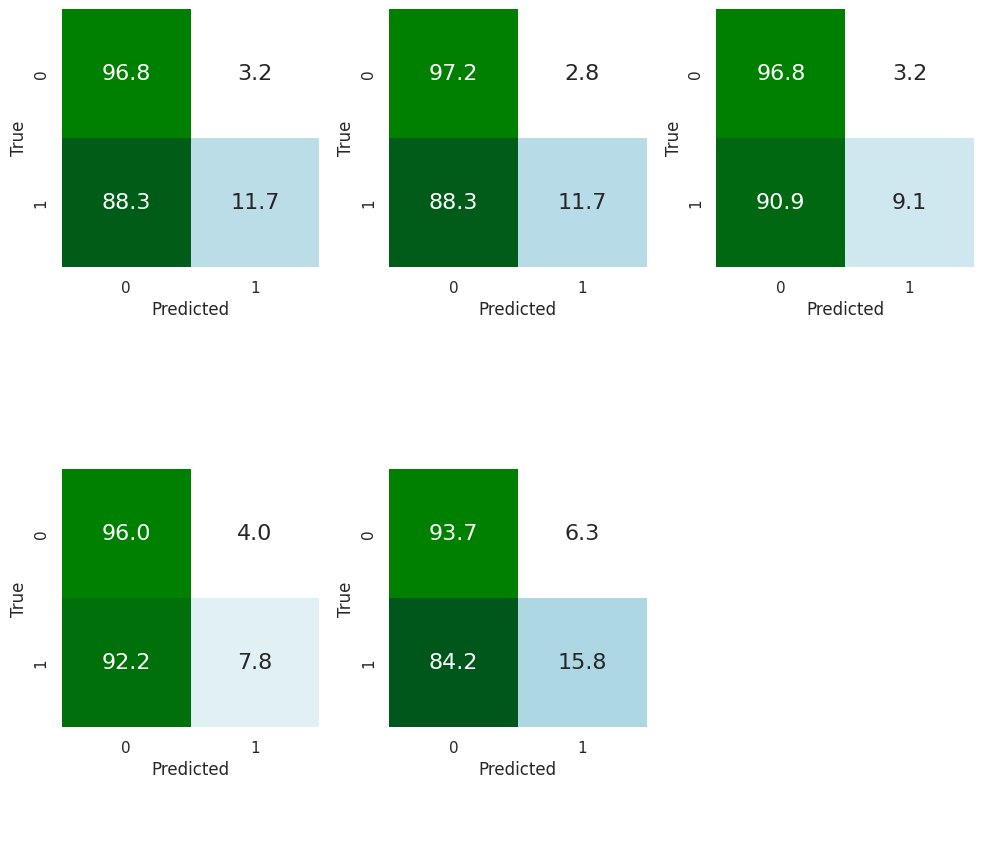

In [59]:
from sklearn.model_selection import StratifiedKFold
import roc_utils as ru
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import precision_score, accuracy_score, recall_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # instancia al objeto cross validator con 5 folds

# Definición de las listas para almacenar las medidas de rendimiento
pre = []
acc = []
sen = []
spe = []

iter = 0
rocs = []

fig, ax = plt.subplots(2,3,figsize = (10,10))
k = 0
    
for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = y[train_index], y[test_index]
    
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearDiscriminantAnalysis(solver='svd')
    model.fit(X_train_scaled, y_train) 
    y_pred_test = model.predict(X_test_scaled)
    
    pre.append(precision_score(y_test,y_pred_test)) 
    acc.append(accuracy_score(y_test,y_pred_test))
    sen.append(recall_score(y_test,y_pred_test))
    spe.append(recall_score(y_test,y_pred_test, pos_label=0))
    
    iter = iter + 1
    print('Iteración', iter)
    print("Precision promedio = ", np.mean(pre))
    print("Accuracy promedio = ", np.mean(acc))
    print("Sensibility promedio = ", np.mean(sen))
    print("Specificity promedio = ", np.mean(spe))
    
    # Matriz de confusion especificando los ejes (aplanados)
    plotCM(y_test,y_pred_test,normalize=True, ax = ax.flatten()[k])
    k += 1
    
    ax[1,2].axis('off')
    plt.show
   
    # set the spacing between subplots
    fig.tight_layout()
  
    #Las curvas ROC de cada iteración    
    y_prob = model.predict_proba(X_test)

    roc = ru.compute_roc(X=y_prob[:,1], y=y_test, pos_label=True)
    rocs.append(roc)

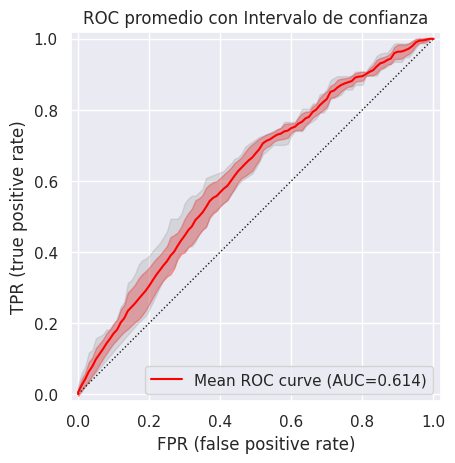

In [60]:
# El promedio, el intervalo de tolerancia (TI) y el intervalo de confianza (IC) de las curvas ROC de cada iteración
ru.plot_mean_roc(rocs, show_ci=True, show_ti=True)
plt.title("ROC promedio con Intervalo de confianza");

### Discusión de resultados

Por úiltimo podemos ver un nuevo modelo mejor que el resto. Observando la validación cruzada, junto con los resultados del entrenamiento y el test, la exactitud alcanzada es de aproximadamente 77% en todos los casos, menor que el anterior modelo

A pesar de ello, en temas generales el modelo 4 sigue siendo mejor al 3. Como hemos visto antes, en el clasificaction report se observa que la precision y el recall de la classe 1 ha mejorado. Esto se corresponde con los resultados de las matrices de confusión, ya que en todas se puede observar que algunas muestras de la clase 1 del test (y el entrenamiento) han sido predecidas correctamente como verdaderas. El valor de AUC que se observa en la curva ROC también ha incrementado en función del resto de modelos, lo cuál confirma que este tercer modelo es mejor que el anterior.

A pesar de las mejoras respecto a los modelos anteriores, cabe destacar que los resultados obtenidos siguen siendo bajos. La exactitud es elevada porque, nuevamente, la gran mayoría de muestras pertenecen a la classe 0 y son classificadas correctamente porqué el modelo tiende a clasificar las muestras como clase 0 (porque ha aprendido que la probabilidad que una muestra pertenezca a esta muestra es mayor).

En definitiva, el modelo 4, dónde se predice la variable ZSN a partir de las variables  AGE, ZSN_A, OTEK_LANC, endocr_01, zab_leg_01 no es un buen clasificador de ZSN. Sin embargo, se trata del mejor clasificador LDA que se ha obtenido en esta actividad.